# Inicialização dataset - Task [001]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ftfy import fix_text
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# open the csv file with pandas and read it into a dataframe
df = pd.read_csv('../datasets/WineDataset.csv')
df2 = pd.read_csv('../datasets/XWines_Full_100K_wines.csv')
df3 = pd.read_csv('../datasets/merged_wine_dataset.csv')

In [ ]:
# print all the information about the dataframe
df.info()
df.describe()

In [ ]:
# print all the information about the dataframe
df2.info()
df2.describe()

In [ ]:
# print all the information about the dataframe
df3.info()
df3.describe()

In [35]:
# fix text using ftfy
# fix all the columns except when the column is a float
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

# fix text using ftfy
# fix all the columns except when the column is a float
for col in df2.columns:
    if df2[col].dtype == 'object': 
        df2[col] = df2[col].apply(lambda x: fix_text(x) if isinstance(x, str) else x)

In [36]:
# view all the unique values for each column except for the columns:'Title' 'Description', 'Country', 'Unit' 'Region' 'Appellation'
for col in df.columns:
    if col not in ['Title', 'Description', 'Country', 'Unit', 'Region', 'Appellation']:
        print(col, df[col].unique())

Price ['£9.99 per bottle' '£15.99 per bottle' '£12.49 per bottle'
 '£17.99 per bottle' '£300.00 per bottle' '£12.99 per bottle'
 '£80.00 per bottle' '£13.99 per bottle' '£8.99 per bottle'
 '£11.99 per bottle' '£46.99 per bottle' '£11.29 per bottle'
 '£22.99 per bottle' '£45.99 per bottle' '£49.99 per bottle'
 '£33.99 per bottle' '£23.99 per bottle' '£21.99 per bottle'
 '£42.99 per bottle' '£29.99 per bottle' '£39.99 per bottle'
 '£14.99 per bottle' '£16.99 per bottle' '£7.99 per bottle'
 '£18.99 per bottle' '£19.99 per bottle' '£10.99 per bottle'
 '£34.99 per bottle' '£43.99 per bottle' '£24.99 per bottle'
 '£35.99 per bottle' '£37.99 per bottle' '£99.99 per bottle'
 '£75.99 per bottle' '£79.00 per case' '£61.99 per bottle'
 '£57.99 per bottle' '£20.99 per bottle' '£44.99 per bottle'
 '£36.99 per bottle' '£69.99 per bottle' '£25.99 per bottle'
 '£6.99 per bottle' '£48.99 per bottle' '£13.00 per bottle'
 '£93.99 per bottle' '£26.99 per bottle' '£49.00 per case'
 '£59.94 per case' '£200.

In [37]:
for col in df3.columns:
    if col not in ['WineName', 'WineryName', 'Grape', 'Secondary Grape Varieties', 'Country', 'Region', 'Appellation', 'Style', 'Characteristics', 'Description']:
        print(col, df3[col].unique())

Price ['£15.99 per bottle' '£17.99 per bottle' '£14.99 per bottle'
 '£12.99 per bottle' '£18.99 per bottle' '£16.99 per bottle'
 '£22.99 per bottle' '£29.99 per bottle' '£21.99 per bottle'
 '£34.99 per bottle' '£13.99 per bottle' '£11.29 per bottle'
 '£11.99 per bottle' '£9.99 per bottle' '£31.99 per bottle'
 '£26.99 per bottle' '£42.99 per bottle' '£37.99 per bottle'
 '£19.99 per bottle' '£32.99 per bottle' '£24.99 per bottle'
 '£79.99 per bottle' '£39.99 per bottle' '£54.99 per bottle'
 '£69.99 per bottle' '£33.99 per bottle' '£99.00 per bottle'
 '£84.99 per bottle' '£23.99 per bottle' '£188.99 per bottle'
 '£49.99 per bottle' '£64.99 per bottle' '£44.99 per bottle'
 '£85.00 per bottle' '£59.99 per bottle' '£12.49 per bottle'
 '£52.99 per bottle' '£30.99 per bottle' '£45.99 per bottle'
 '£89.99 per bottle' '£27.99 per bottle' '£7.99 per bottle'
 '£10.99 per bottle' '£169.99 per bottle' '£72.99 per bottle'
 '£20.99 per bottle' '£60.99 per bottle' '£75.99 per bottle'
 '£25.99 per bottl

# Limpeza de dados
- Remoção de valores nulos
- Normalização de valores
- Remoção de colunas desnecessárias

In [38]:
# Print wine where wineid 131027
print(df2.loc[df2['WineID'] == 131027])

#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity'

one_hot_encoded_df = pd.get_dummies(df2, columns=['Type','Body','Acidity','Elaborate'], prefix=['Type','Body','Acidity','Elaborate'])

# Binary Encoding for the column 'Country', 'RegionName', 'Grapes', 'Harmonize'

encoder = BinaryEncoder(cols=['Grapes', 'Harmonize'], return_df=True)
binary_encoded_df = encoder.fit_transform(df2)

encoded_df = pd.concat([one_hot_encoded_df, binary_encoded_df], axis=1)

# Normalize the 'ABV' column using MinMaxScaler
scaler = MinMaxScaler()

# Normalizing the 'ABV' column
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])


encoded_df = encoded_df.drop(columns=df2.columns)	
encoded_df = encoded_df.dropna()

# Display the updated DataFrame
print(encoded_df)


       WineID           WineName  Type         Elaborate  \
31005  131027  Rosé Alcohol Free  Rosé  Assemblage/Blend   

                         Grapes  \
31005  ['Chardonnay', 'Merlot']   

                                               Harmonize  ABV           Body  \
31005  ['Beef', 'Pork', 'Game Meat', 'Rich Fish', 'Ve...  0.0  Medium-bodied   

      Acidity Code Country  RegionID RegionName  WineryID   WineryName  \
31005  Medium   FR  France      1327  Languedoc     25983  Pierre Zero   

                           Website  \
31005  https://www.pierre-zero.com   

                                                Vintages  
31005  [2020, 2019, 2018, 2017, 2016, 2015, 2014, 201...  


/Users/ricardo.manoel/Documents/ISEP/MEIA_ISEP_TEAM7_2024_2025_Challenge_2/.venv/lib/python3.9/site-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


        Type_Dessert  Type_Dessert/Port  Type_Red  Type_Rosé  Type_Sparkling  \
0              False              False     False      False            True   
1              False              False      True      False           False   
2              False              False      True      False           False   
3              False              False     False      False           False   
4              False              False      True      False           False   
...              ...                ...       ...        ...             ...   
100641         False              False     False      False           False   
100642          True              False     False      False           False   
100643         False              False     False      False           False   
100644         False              False     False      False           False   
100645         False              False      True      False           False   

        Type_White  Body_Full-bodied  B

# Classification Dataset Preprocessing - Task [066]
### Normalizing Harmonize and grouping it into broader categories

In [39]:
# Replace dishes with their broader categories in the Harmonize column
df2['Harmonize'] = df2['Harmonize'].apply(eval)
dish_to_category = {
    'Beef': 'Meat', 'Lamb': 'Meat', 'Pork': 'Meat', 'Veal': 'Meat', 'Game Meat': 'Meat',
    'Duck': 'Meat', 'Ham': 'Meat', 'Cold Cuts': 'Meat', 'Cured Meat': 'Meat',
    'Poultry': 'Poultry', 'Chicken': 'Poultry',
    'Rich Fish': 'Fish & Seafood', 'Lean Fish': 'Fish & Seafood', 'Shellfish': 'Fish & Seafood',
    'Seafood': 'Fish & Seafood', 'Sushi': 'Fish & Seafood', 'Sashimi': 'Fish & Seafood',
    'Codfish': 'Fish & Seafood', 'Fish': 'Fish & Seafood', 'Grilled': 'Fish & Seafood',
    'Soft Cheese': 'Cheese', 'Hard Cheese': 'Cheese', 'Blue Cheese': 'Cheese',
    'Maturated Cheese': 'Cheese', 'Goat Cheese': 'Cheese', 'Mild Cheese': 'Cheese',
    'Medium-cured Cheese': 'Cheese', 'Cheese': 'Cheese',
    'Pasta': 'Pasta', 'Tagliatelle': 'Pasta', 'Lasagna': 'Pasta',
    'Paella': 'Fish & Seafood', 'Pizza' : 'Pasta',
    'Vegetarian': 'Vegetarian & Vegan', 'Mushrooms': 'Vegetarian & Vegan', 'Salad': 'Vegetarian & Vegan',
    'Fruit': 'Vegetarian & Vegan', 'Tomato Dishes': 'Vegetarian & Vegan', 'Beans': 'Vegetarian & Vegan',
    'Eggplant Parmigiana': 'Vegetarian & Vegan', 'Light Stews': 'Vegetarian & Vegan',
    'Appetizer': 'Appetizers & Snacks', 'Snack': 'Appetizers & Snacks',
    'Aperitif': 'Appetizers & Snacks', 'French Fries': 'Appetizers & Snacks', 'Baked Potato': 'Appetizers & Snacks',
    'Cream': 'Appetizers & Snacks',
    'Sweet Dessert': 'Desserts', 'Fruit Dessert': 'Desserts', 'Citric Dessert': 'Desserts',
    'Cake': 'Desserts', 'Chocolate': 'Desserts', 'Cookies': 'Desserts',
    'Chestnut': 'Desserts', 'Spiced Fruit Cake': 'Desserts', 'Dessert': 'Desserts',
    'Soufflé': 'Desserts', 'Dried Fruits': 'Desserts',
    'Spicy Food': 'Spicy Food', 'Curry Chicken': 'Spicy Food', 'Asian Food': 'Spicy Food', 'Yakissoba': 'Spicy Food',
    'Barbecue': 'Meat', 'Roast': 'Meat'
}

columns = df2.columns
new_harmonize = df2.copy()
new_harmonize['Harmonize'] = df2['Harmonize'].apply(lambda x: list(set(dish_to_category.get(dish, dish) for dish in x)))

# Expand the Harmonize column into multiple rows, one for each dish
new_harmonize = new_harmonize.explode('Harmonize')

# Reset the index for consistency and remove any rows with 'Risotto' because it has a number of insignificant occurrences
new_harmonize.reset_index(drop=True, inplace=True)
new_harmonize = new_harmonize[new_harmonize['Harmonize'].apply(lambda x: 'Risotto' not in x)]
df2 = new_harmonize.copy()

# Get the unique dishes
unique_categories = df2['Harmonize'].unique()

# One-hot encoding
for dish in unique_categories:
    new_harmonize[f'Harmonize_{dish}'] = new_harmonize['Harmonize'].apply(lambda x: x == dish)
# Turn new_harmonize into a harmonize dataframe
new_harmonize = new_harmonize.drop(columns=columns)


### Normalizing the rest of the columns

In [40]:
#One-Hot Encoding for the column 'Type' 'Elaborate' 'Body', 'Acidity'
one_hot_encoded_df = pd.get_dummies(df2, columns=['Type', 'Elaborate', 'Body', 'Acidity'])

# Binary Encoding for the column 'Grapes'
encoder = BinaryEncoder(cols=['Grapes'], return_df=True)
binary_encoded_df = encoder.fit_transform(df2)

encoded_df = one_hot_encoded_df.copy()

# Maximum ABV value
print(encoded_df['ABV'].min())
print(encoded_df['ABV'].max())

# get the row where the abv is min
print(encoded_df[encoded_df['ABV'] == encoded_df['ABV'].min()])


# Normalizing the 'ABV' column
scaler = MinMaxScaler()
encoded_df['ABV'] = scaler.fit_transform(encoded_df[['ABV']])


# Dropping unnecessary columns
encoded_df = encoded_df.drop(columns=['Country', 'RegionName', 'Code', 'WineName', 'WineID', 'Vintages', 'Website', 'WineryID', 'WineryName', 'RegionID','Grapes','Harmonize'])
encoded_df = encoded_df.dropna()
# add new_harmonize to the encoded_df
encoded_df = pd.concat([encoded_df, new_harmonize], axis=1)

/Users/ricardo.manoel/Documents/ISEP/MEIA_ISEP_TEAM7_2024_2025_Challenge_2/.venv/lib/python3.9/site-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


0.0
50.0
        WineID                               WineName  \
2583    101082                   Espumante Sem Álcool   
2584    101082                   Espumante Sem Álcool   
2585    101082                   Espumante Sem Álcool   
2586    101082                   Espumante Sem Álcool   
23773   108785          Eins Zwei Zero Sparkling Rosé   
23774   108785          Eins Zwei Zero Sparkling Rosé   
23775   108785          Eins Zwei Zero Sparkling Rosé   
23776   108785          Eins Zwei Zero Sparkling Rosé   
26323   109551     Eins Zwei Zero Summer Alcohol Free   
26324   109551     Eins Zwei Zero Summer Alcohol Free   
26325   109551     Eins Zwei Zero Summer Alcohol Free   
26326   109551     Eins Zwei Zero Summer Alcohol Free   
26327   109551     Eins Zwei Zero Summer Alcohol Free   
26328   109551     Eins Zwei Zero Summer Alcohol Free   
51233   118468  Bourgogne Côte Chalonnaise Chardonnay   
51234   118468  Bourgogne Côte Chalonnaise Chardonnay   
51235   118468  Bourgo

### Boxplot

<Axes: xlabel='ABV'>

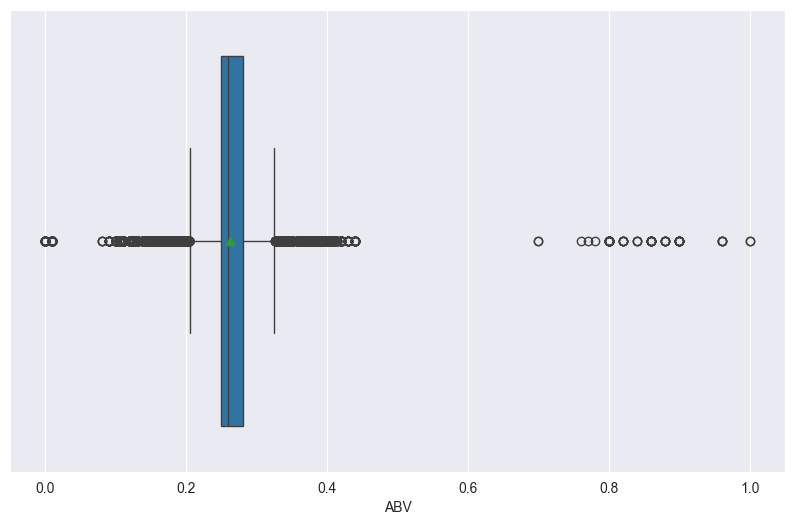

In [41]:
# Calculate the IQR
numeric_df = encoded_df['ABV']
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
iqr = q3 - q1

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=numeric_df, showmeans=True, orient="h")

Analyzing the resulting boxplot, we observe that some values fall outside the ranges but are still relevant, as 0% alcohol wines, including dealcoholized varieties, remain within the wine category. These options retain the essence of traditional wines without alcohol. Additionally, beverages like firewater, with higher alcohol content, can also bring value to the project.

### Correlation Matrix

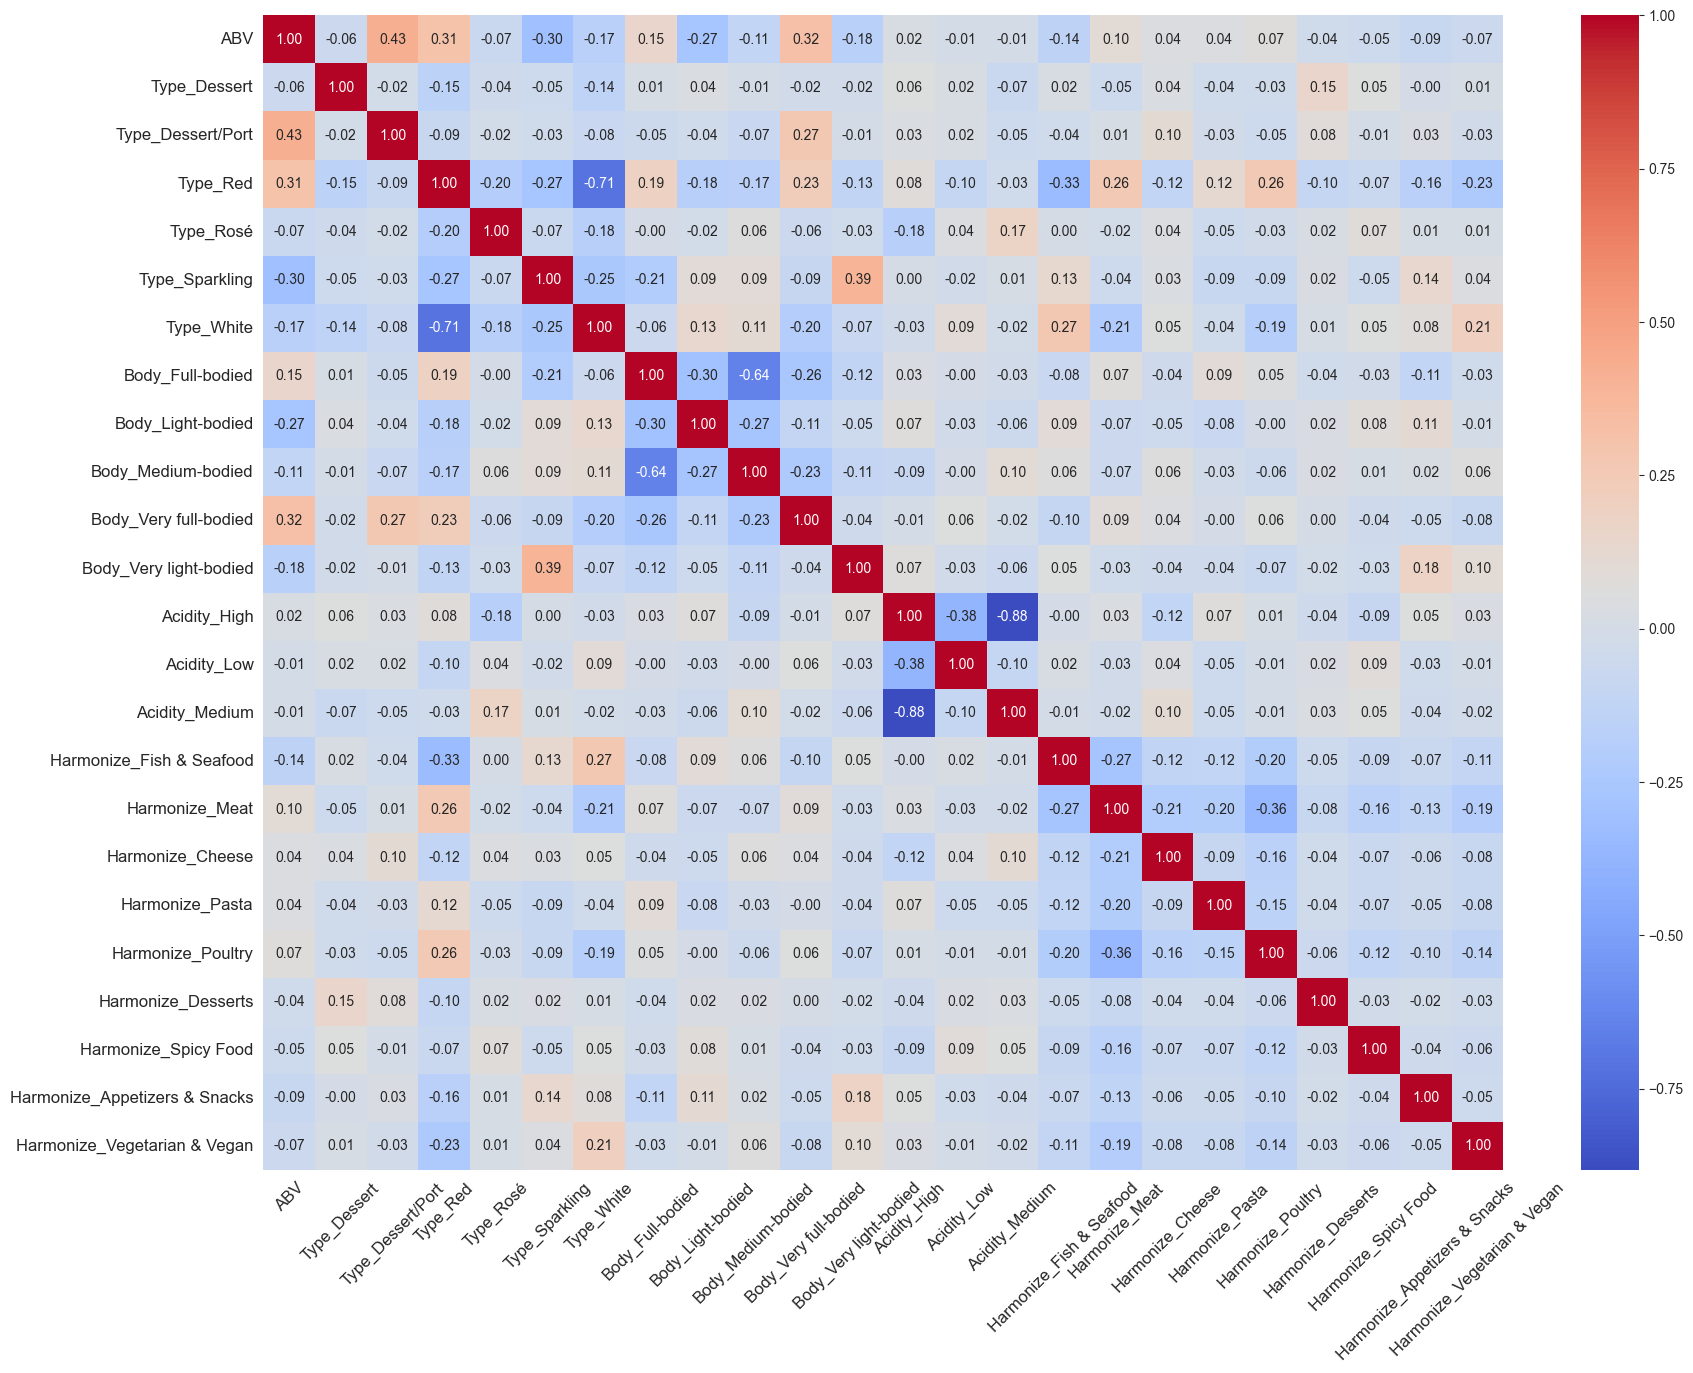

In [42]:
# Compute the correlation matrix without the Elaborate columns to reduce the size of the heatmap
elaborate_columns = encoded_df.columns[encoded_df.columns.str.startswith('Elaborate_')]
matrix_df = encoded_df.drop(columns=elaborate_columns)
correlation_matrix = matrix_df.corr()


plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    annot_kws={"size": 10}
)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Analyzing the matrix, we observe that it is relatively ‘cold,’ meaning it exhibits a low correlation index overall. Despite the generally low correlations between features, certain specific relationships do stand out. For instance, some dishes in the ‘Harmonize’ category show a notable correlation with particular wines, while certain body characteristics correlate with the alcohol by volume (ABV) and wine types.

### PCA

Generating PCA plot for label column: Harmonize_Fish & Seafood


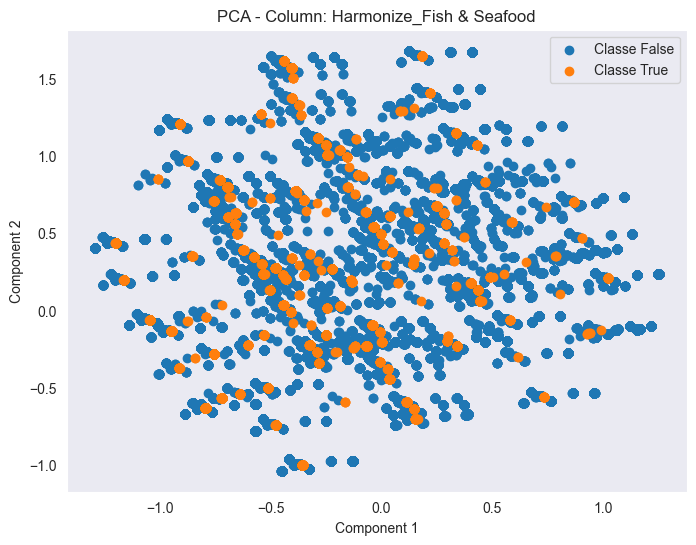

Generating PCA plot for label column: Harmonize_Meat


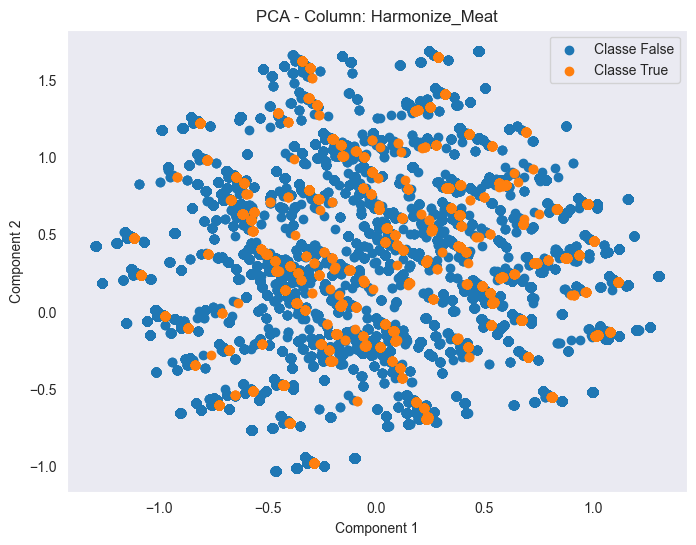

Generating PCA plot for label column: Harmonize_Cheese


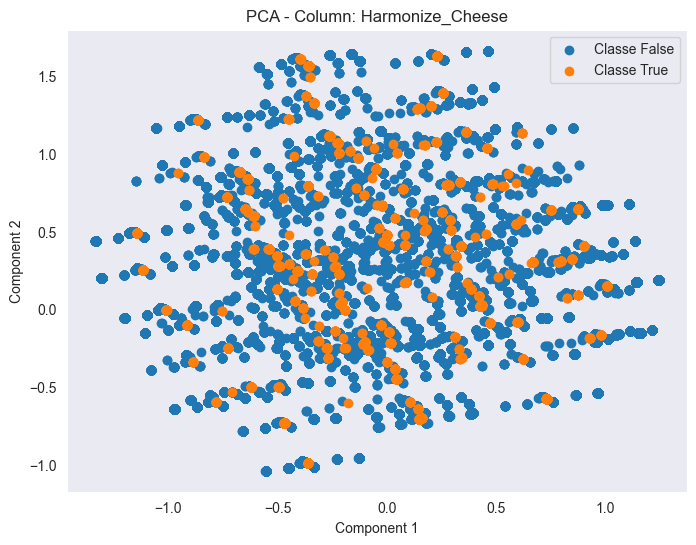

Generating PCA plot for label column: Harmonize_Pasta


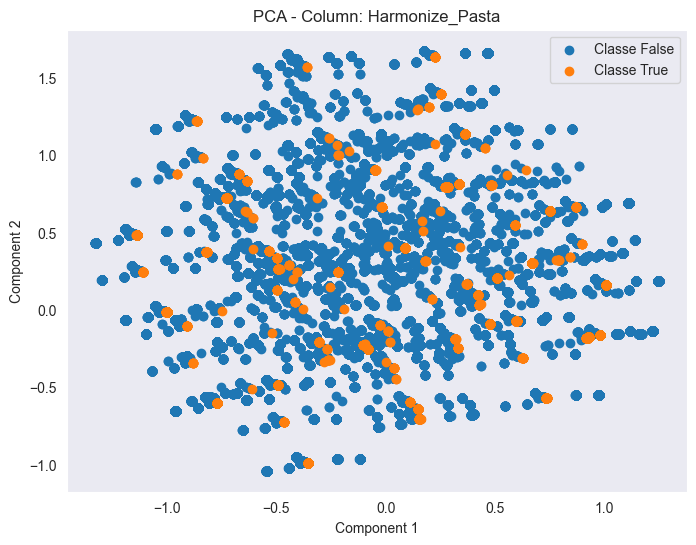

Generating PCA plot for label column: Harmonize_Poultry


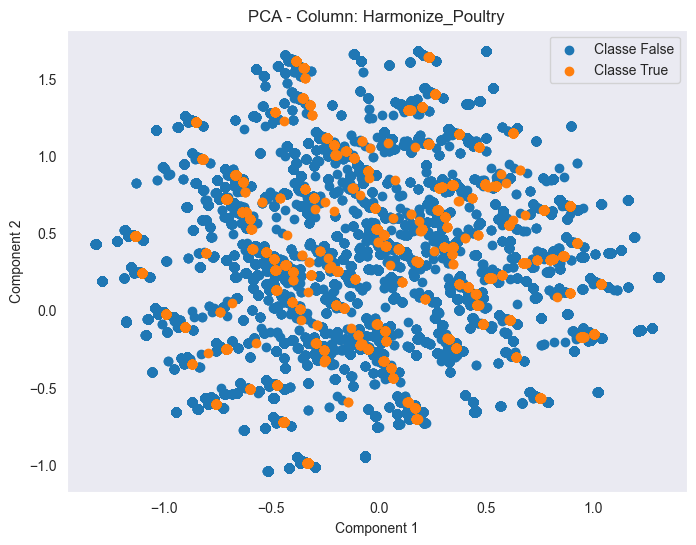

Generating PCA plot for label column: Harmonize_Desserts


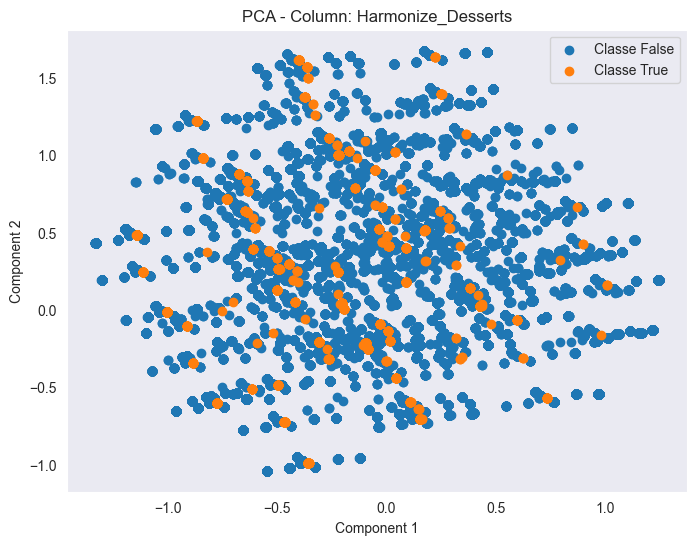

Generating PCA plot for label column: Harmonize_Spicy Food


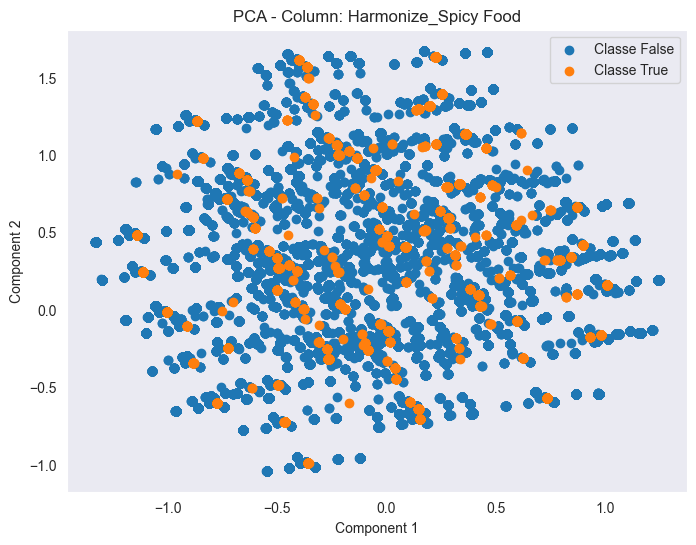

Generating PCA plot for label column: Harmonize_Appetizers & Snacks


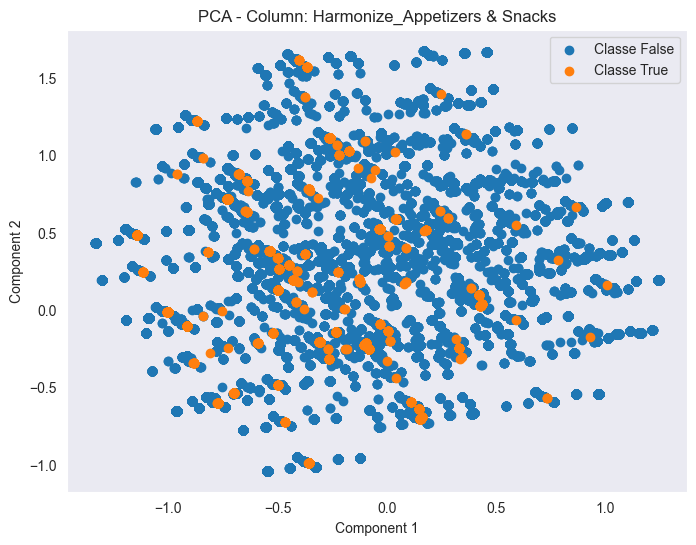

Generating PCA plot for label column: Harmonize_Vegetarian & Vegan


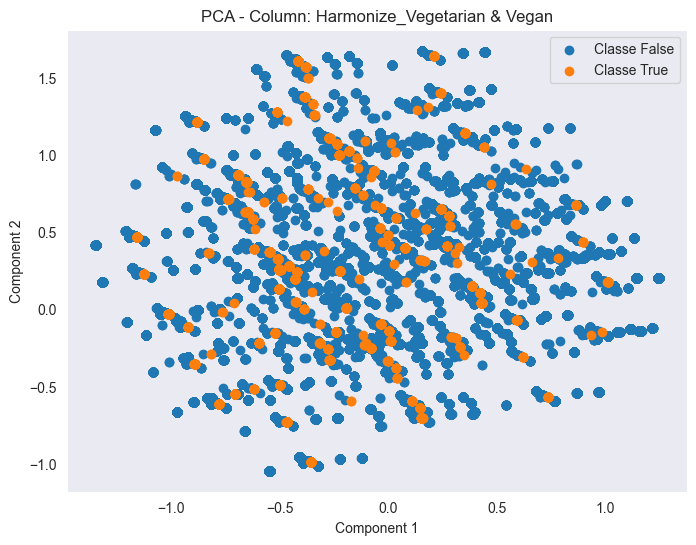

In [43]:
from sklearn.decomposition import PCA

harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]

# Loop through each 'harmonize_' column and perform PCA
for label_col in harmonize_columns:
    print(f"Generating PCA plot for label column: {label_col}")

    features = encoded_df.drop(columns=[label_col])
    labels = encoded_df[label_col].values

    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(features)

    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(
            df_pca[labels == label, 0], 
            df_pca[labels == label, 1], 
            label=f'Classe {label}'
        )

    plt.title(f'PCA - Column: {label_col}')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.grid()
    plt.show()

When applying PCA to identify patterns and relationships among the different categories in the ‘Harmonize’ column, we encountered inconclusive results. The resulting plots showed the various categories exhibiting similar patterns, with data points widely scattered across the graphical space rather than concentrated in specific zones.

### Task neural network

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Epoch 1/50


/Users/ricardo.manoel/Documents/ISEP/MEIA_ISEP_TEAM7_2024_2025_Challenge_2/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5563/5563 ━━━━━━━━━━━━━━━━━━━━ 3s 592us/step - accuracy: 0.3177 - loss: 1.7557 - val_accuracy: 0.3392 - val_loss: 1.6209
Epoch 2/50
5563/5563 ━━━━━━━━━━━━━━━━━━━━ 3s 559us/step - accuracy: 0.3426 - loss: 1.6207 - val_accuracy: 0.3398 - val_loss: 1.6154
Epoch 3/50
5563/5563 ━━━━━━━━━━━━━━━━━━━━ 3s 563us/step - accuracy: 0.3404 - loss: 1.6170 - val_accuracy: 0.3393 - val_loss: 1.6144
Epoch 4/50
5563/5563 ━━━━━━━━━━━━━━━━━━━━ 3s 568us/step - accuracy: 0.3409 - loss: 1.6178 - val_accuracy: 0.3371 - val_loss: 1.6145
Epoch 5/50
5563/5563 ━━━━━━━━━━━━━━━━━━━━ 3s 565us/step - accuracy: 0.3396 - loss: 1.6178 - val_accuracy: 0.3370 - val_loss: 1.6143
Epoch 6/50
5563/5563 ━━━━━━━━━━━━━━━━━━━━ 3s 564us/step - accuracy: 0.3429 - loss: 1.6150 - val_accuracy: 0.3393 - val_loss: 1.6137
Epoch 7/50
5563/5563 ━━━━━━━━━━━━━━━━━━━━ 3s 564us/step - accuracy: 0.3399 - loss: 1.6146 - val_accuracy: 0.3377 - val_loss: 1.6138
Epoch 8/50
5563/5563 ━━━━━━━━━━━━━━━━━━━━ 3s 568us/step - accuracy: 0.3422 - loss: 1.61

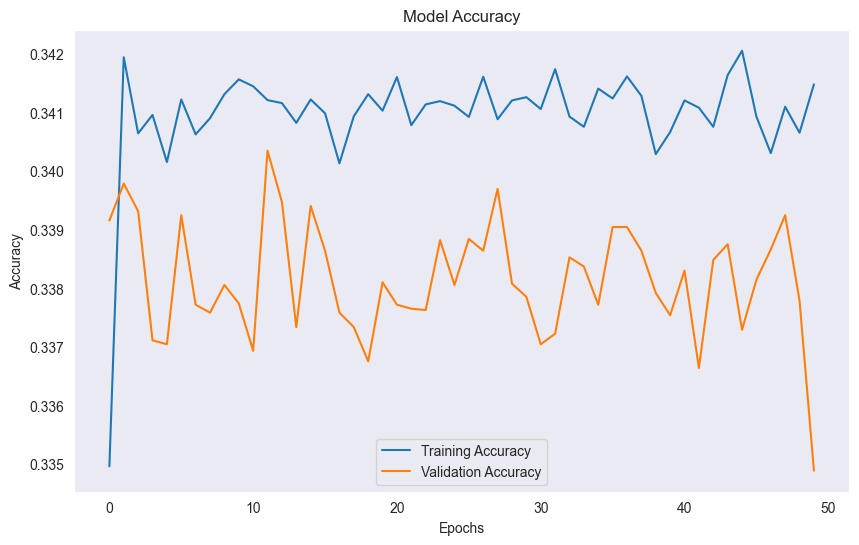

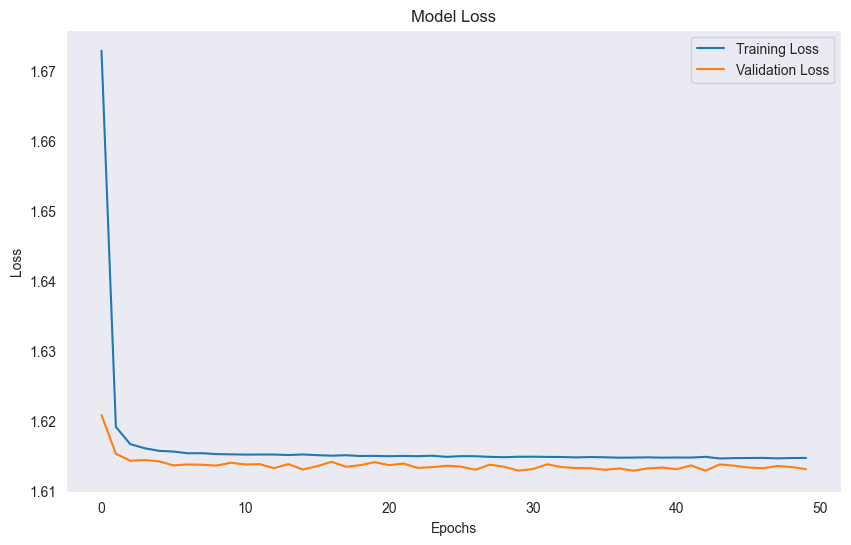

1739/1739 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step


KeyError: 'Meat'

In [45]:
# Normalize numerical features (e.g., 'ABV')
scaler = MinMaxScaler()
numeric_columns = ['ABV']  # Add other numeric columns if applicable
encoded_df[numeric_columns] = scaler.fit_transform(encoded_df[numeric_columns])

# Step 2: Feature and Target Preparation
harmonize_columns = [col for col in encoded_df.columns if col.startswith('Harmonize_')]
features = encoded_df.drop(columns=harmonize_columns)  # Features exclude harmonize columns
labels = encoded_df[harmonize_columns]  # Targets are harmonize columns

# Step 3: PCA (Optional - Uncomment if needed for dimensionality reduction)
# pca = PCA(n_components=10)  # Retain 10 components or adjust based on explained variance
# features = pca.fit_transform(features)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Step 5: Neural Network Setup
model = Sequential([
    Dense(units=y_train.shape[1], input_dim=X_train.shape[1], activation='softmax')  # Single-layer with softmax
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 7: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 8: Visualize Training Progress
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()



In [48]:
# Step 9: Predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
y_true_classes = np.argmax(y_test.values, axis=1)

# Map Predictions to Wines and Grapes
original_df = encoded_df.copy()  # Make a copy of the original dataset before one-hot encoding

# Restore Harmonize mapping
harmonize_mapping = {col: col.replace("Harmonize_", "") for col in harmonize_columns}
predicted_harmonize_labels = [harmonize_mapping[harmonize_columns[pred]] for pred in predicted_classes]

# Map predictions back to wines and grapes
results = []
for harmonize_label in predicted_harmonize_labels:
    matching_rows = original_df[original_df[harmonize_label] == 1]
    wines = matching_rows['WineName'].tolist()  # Adjust column name if needed
    grapes = matching_rows['Grape'].tolist()  # Adjust column name if needed
    results.append({"Harmonize": harmonize_label, "Wines": wines, "Grapes": grapes})

# Print results for each test sample
for i, result in enumerate(results):
    print(f"Test Sample {i + 1}:")
    print(f"Harmonize: {result['Harmonize']}")
    print(f"Wines: {result['Wines']}")
    print(f"Grapes: {result['Grapes']}")
    print("-" * 40)

# Optionally, print a classification report or confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_true_classes, predicted_classes))

1739/1739 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step


KeyError: 'Meat'